# Capstone Project - Chicago Crime Data and Census Data Insight
## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#method)


## Introduction <a name="introduction"></a>

Crime rate is believed to be highly related to economy. The economic crisis that happened in 2008 is the turning point of the world, especially the US. Therefore, it is meaningful to study whether this turning point has affected the crime rate from the real data and how crime rate impacts the population and income.

This project has choosen one of the metropolises in USA, Chicago as the investigation object. The time span of interest is 8 years spanning the year of 2008. The objective of the project is to provide an insight of the crime data scraped from Chicago Data Portal and conclude the impact of 2008 crisis on Chicago's crime rate. Additionally, the census data of Chicago from 2008 to 2012 will be investigated to find the impact of crime, particularly after 2008, on the population and economy of individual community and the whole city. 

The target audience of the project with its elaborate visualisation results will benefit any groups of audiences who are interested in economy-crime topic or those who are concerned about crime rate when doing investment or business such as real estate and small business.

## Data <a name="data"></a>
### Understanding the Datasets

This project will be using two datasets that are available on the city of Chicago's Data Portal:

1.  <a href="https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2">Census Data - Socioeconomic Indicators in Chicago</a>

This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” by Chicago community area, for the years 2008 – 2012. The indicators are the percent of occupied housing units with more than one person per room (i.e., crowded housing); the percent of households living below the federal poverty level; the percent of persons in the labor force over the age of 16 years that are unemployed; the percent of persons over the age of 25 years without a high school diploma; the percent of the population under 18 or over 64 years of age (i.e., dependency); and per capita income. Indicators for Chicago as a whole are provided in the final row of the table.
2.  <a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">Chicago Crime Data</a>

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

Chicago Crime Data will be used to obtain a comprehensive understanding of crime rate from 2004 to 2012 including the trend, types of crimes, crime rate of different communities and so on. Data visualization will help to achieve this goal. Census data of all the communities of Chicago will be jointly considered to give a clear picture of the connection of community population and income to crime rat of that area.

The Chicago Crime Data contains 22 features as shown in the results of the following Python code. The primary features we are interested in are listed below:
- **YEAR** Year the incident occurred.
- **PRIMARY_TYPE** The primary description of the IUCR code.
- **COMMUNITY_AREA_NUMBER** Indicates the community area where the incident occurred. Chicago has 77 community areas.
- **LOCATION_DESCRIPTION** Description of the location where the incident occurred.
- **LATITUDE** The latitude of the location where the incident occurred.
- **LONGITUDE** The longitude of the location where the incident occurred.

The Census Data has 9 features and the following are essential to this project:
- **COMMUNITY_AREA_NUMBER** Indicates the community area where the incident occurred. Chicago has 77 community areas.
- **COMMUNITY_AREA_NAME** Community actual name
- **PERCENT HOUSEHOLDS BELOW POVERTY** Percent of households living below the federal poverty level
- **PER_CAPITA_INCOME** Community Area Per capita income is estimated as the sum of tract-level aggregate incomes divided by the total population

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # to remove SettingWithCopyWarning
CrimeData = pd.read_csv('Chicago_Crime_Data-example.csv')
CrimeData.head(1)

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"


In [4]:
CensusData = pd.read_csv('Census_Data.csv')
CensusData.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


### Data Preparation

In [5]:
# retrieve crime data of years from 2004 to 2012 from database
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)
results = client.get("ijzp-q8t2",where = "year between 2004 and 2012",limit=5000000)


# Convert to pandas DataFrame
df_Crime_Chicago = pd.DataFrame.from_records(results)

print(df_Crime_Chicago.shape)
df_Crime_Chicago.head()

(3686677, 22)


,id,case_number,date,block,iucr,primary_type,description,arrest,domestic,beat,...,community_area,fbi_code,year,updated_on,location_description,x_coordinate,y_coordinate,latitude,longitude,location
0,11645833,JC213044,2012-05-05T12:25:00.000,057XX W OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,1511,...,25,11,2012,2019-04-06T16:04:43.000,NaN,NaN,NaN,NaN,NaN,NaN
1,11227247,JB147078,2012-01-01T09:00:00.000,105XX S INDIANAPOLIS AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,0432,...,52,11,2012,2018-02-11T15:57:41.000,RESIDENCE,NaN,NaN,NaN,NaN,NaN
2,10225605,HY412867,2012-07-11T09:00:00.000,017XX W ALBION AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,2432,...,1,11,2012,2018-02-10T15:50:01.000,APARTMENT,1163498,1943889,42.00167049,-87.673863642,"{'latitude': '42.00167049', 'longitude': '-87...."
3,10225648,HY412901,2011-08-01T08:00:00.000,080XX S TRUMBULL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,0834,...,70,11,2011,2018-02-09T15:44:29.000,RESIDENCE,1154779,1851149,41.747362057,-87.708423712,"{'latitude': '41.747362057', 'longitude': '-87..."
4,11042125,JA376558,2011-12-16T00:00:00.000,003XX W 64TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,0722,...,68,11,2011,2017-08-05T15:50:08.000,HOSPITAL BUILDING/GROUNDS,NaN,NaN,NaN,NaN,NaN


In [6]:
# Data cleansing for crime data
interested_columns = ['year','community_area','primary_type', 'location_description','latitude','longitude' ]
# Get interested features
df = df_Crime_Chicago[interested_columns]
# Remove NAN rows
df.dropna(axis=0,how='any',inplace=True)
df.reset_index(drop=True,inplace=True)
# Change datatype
df['community_area'] = df['community_area'].astype('int64')
df['latitude'] = df['latitude'].astype('float')
df['longitude']=df['longitude'].astype('float')
# Modify column names for convenience
df.set_axis(labels=['Year','Community Area Number','Primary Type','Location Description','latitude','longitude'],axis=1,inplace=True)
# Final version of crime data
Chicago_Crime = df

In [7]:
print(Chicago_Crime.shape)
Chicago_Crime.head()

(3659533, 6)


,Year,Community Area Number,Primary Type,Location Description,latitude,longitude
0,2012,1,DECEPTIVE PRACTICE,APARTMENT,42.001670,-87.673864
1,2011,70,DECEPTIVE PRACTICE,RESIDENCE,41.747362,-87.708424
2,2012,19,THEFT,OTHER,41.917863,-87.744601
3,2012,30,DECEPTIVE PRACTICE,RESIDENCE,41.841362,-87.729335
4,2011,25,DECEPTIVE PRACTICE,RESIDENCE,41.891766,-87.766554


In [14]:
# release some memories
del df


In [8]:
# Data cleansing for census data
CensusData.dropna(axis=0,how='any',inplace=True)
CensusData['Community Area Number'] = CensusData['Community Area Number'].astype('int64')
CensusData = CensusData[['Community Area Number','COMMUNITY AREA NAME','PER CAPITA INCOME ','PERCENT HOUSEHOLDS BELOW POVERTY']]
print(CensusData.shape)
CensusData.head()

(77, 4)


,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,PERCENT HOUSEHOLDS BELOW POVERTY
0,1,Rogers Park,23939,23.6
1,2,West Ridge,23040,17.2
2,3,Uptown,35787,24.0
3,4,Lincoln Square,37524,10.9
4,5,North Center,57123,7.5


In [16]:
# Insert community names for Chicago crime data
communityNames = CensusData[['Community Area Number','COMMUNITY AREA NAME']]
Chicago_Crime = Chicago_Crime.join(communityNames.set_index('Community Area Number'), on='Community Area Number',how='inner')
Chicago_Crime.sort_values(by='Year',inplace=True)
Chicago_Crime.reset_index(drop=True,inplace=True)

In [32]:
Chicago_Crime.head(10)

,Year,Community Area Number,Primary Type,Location Description,latitude,longitude,COMMUNITY AREA NAME
0,2004,16,THEFT,RESTAURANT,41.946066,-87.735295,Irving Park
1,2004,22,BATTERY,"SCHOOL, PUBLIC, BUILDING",41.916044,-87.721632,Logan Square
2,2004,22,DECEPTIVE PRACTICE,APARTMENT,41.916651,-87.672730,Logan Square
3,2004,22,THEFT,OTHER,41.924851,-87.693154,Logan Square
4,2004,22,ROBBERY,STREET,41.931216,-87.710293,Logan Square
5,2004,22,THEFT,RESIDENCE,41.918159,-87.696197,Logan Square
6,2004,22,CRIMINAL DAMAGE,COMMERCIAL / BUSINESS OFFICE,41.917113,-87.687396,Logan Square
7,2004,22,OTHER OFFENSE,RESIDENCE,41.917435,-87.702869,Logan Square
8,2004,22,THEFT,STREET,41.916018,-87.673280,Logan Square
9,2004,22,MOTOR VEHICLE THEFT,STREET,41.929621,-87.712234,Logan Square


So far, data is ready to use for analysis. *Chicago_Crime* is the pandas dataframe storing crime data from 2004 to 2012 and *CensusData* contains census data from 2008 to 2012. 

## Methodology <a name="method"></a>
This section covers the methodology used to analyse Chicago's crime data as well as the census data. The aim is to elaborate any correlations, trend and distribution by means of statistical analysis, visualization and machine learning tool.

In [200]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

Matplotlib version:  3.1.3
Libraries imported.


### General description of two dataframes

In [201]:
Chicago_Crime.describe(include='all')

,Year,Community Area Number,Primary Type,Location Description,latitude,longitude,COMMUNITY AREA NAME
count,3659477,3.659477e+06,3659477,3659477,3.659477e+06,3.659477e+06,3659477
unique,9,NaN,32,170,NaN,NaN,77
top,2004,NaN,THEFT,STREET,NaN,NaN,Austin
freq,467119,NaN,740970,959061,NaN,NaN,235387
mean,NaN,3.787603e+01,NaN,NaN,4.184078e+01,-8.767188e+01,NaN
std,NaN,2.160002e+01,NaN,NaN,9.052910e-02,6.234809e-02,NaN
min,NaN,1.000000e+00,NaN,NaN,3.661945e+01,-9.168657e+01,NaN
25%,NaN,2.300000e+01,NaN,NaN,4.176788e+01,-8.771398e+01,NaN
50%,NaN,3.300000e+01,NaN,NaN,4.185226e+01,-8.766638e+01,NaN
75%,NaN,5.800000e+01,NaN,NaN,4.190660e+01,-8.762845e+01,NaN


In [202]:
CensusData.describe(include='all')

,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,PERCENT HOUSEHOLDS BELOW POVERTY
count,77.000000,77,77.000000,77.000000
unique,NaN,77,NaN,NaN
top,NaN,Austin,NaN,NaN
freq,NaN,1,NaN,NaN
mean,39.000000,NaN,25563.168831,21.766234
std,22.371857,NaN,15293.098259,11.529957
min,1.000000,NaN,8201.000000,3.300000
25%,20.000000,NaN,15754.000000,13.200000
50%,39.000000,NaN,21323.000000,18.900000
75%,58.000000,NaN,28887.000000,29.200000


### Number of crimes over the 9 years
This shows a trend of the number of crimes committed in Chicago.

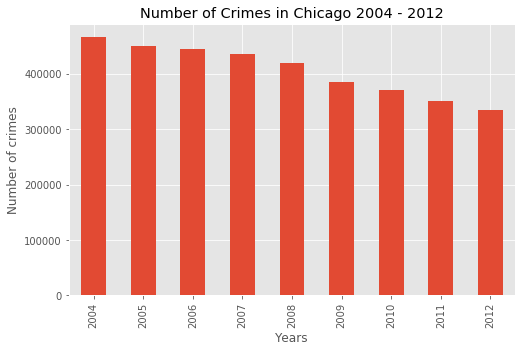

In [203]:
# generate a new dataframe for plotting
df1 = Chicago_Crime.groupby('Year').count()
df1 = df1[['Community Area Number']].rename(columns={'Community Area Number':'Number of crimes'})
# bar plot 
df1.plot.bar(y='Number of crimes',figsize=(8,5),legend=False)
plt.title('Number of Crimes in Chicago 2004 - 2012')
plt.ylabel('Number of crimes')
plt.xlabel('Years')

plt.show()

### Statistical analysis of different crime types

#### Bar chart
Overall view of the total number of crimes of different types over the 9 years. Only those types committed over 5000 times are plotted.

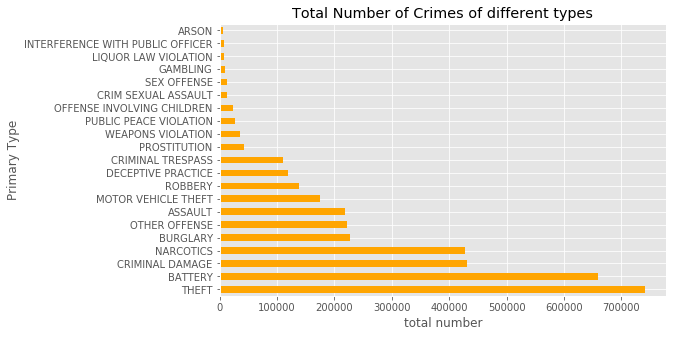

In [204]:
df2 = Chicago_Crime.groupby('Primary Type').count()
df2 = df2[['Community Area Number']].rename(columns={'Community Area Number':'Counts'})
df2.sort_values(by='Counts',ascending=False,inplace=True)
df2 = df2[df2.Counts>5000]
df2.plot.barh(y='Counts',figsize=(8,5),color='orange',legend=False)

plt.title('Total Number of Crimes of different types')
plt.xlabel('total number')
plt.show()

#### Economy related crimes
This line chart aims to show a variation trend over the 9 years of crime types that are potentially related to economy such as theft, robbery, narcotics and so on. Meanwhile, a box plot is used to statistically demonstrate the *distribution*.

In [205]:
economy_related_types = ['THEFT','DECEPTIVE PRACTICE','NARCOTICS','ROBBERY','BURGLARY','MOTOR VEHICLE THEFT']
economy_related = Chicago_Crime[Chicago_Crime['Primary Type'].isin(economy_related_types)]
economy_related = economy_related[['Year','Primary Type']]
economy_related.set_index('Year',inplace=True)
economy_related = pd.get_dummies(economy_related[['Primary Type']],prefix="",prefix_sep="")
economy_related = economy_related.groupby(by='Year').sum()

In [206]:
economy_related.head()

,BURGLARY,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,NARCOTICS,ROBBERY,THEFT
Year,,,,,,
2004,24518.0,13076.0,22745.0,56878.0,15949.0,94632.0
2005,25413.0,13153.0,22384.0,55945.0,15987.0,84298.0
2006,24302.0,13264.0,21784.0,55327.0,15942.0,85223.0
2007,24825.0,13861.0,18551.0,54406.0,15443.0,84557.0
2008,25996.0,14270.0,18621.0,45054.0,16590.0,86345.0


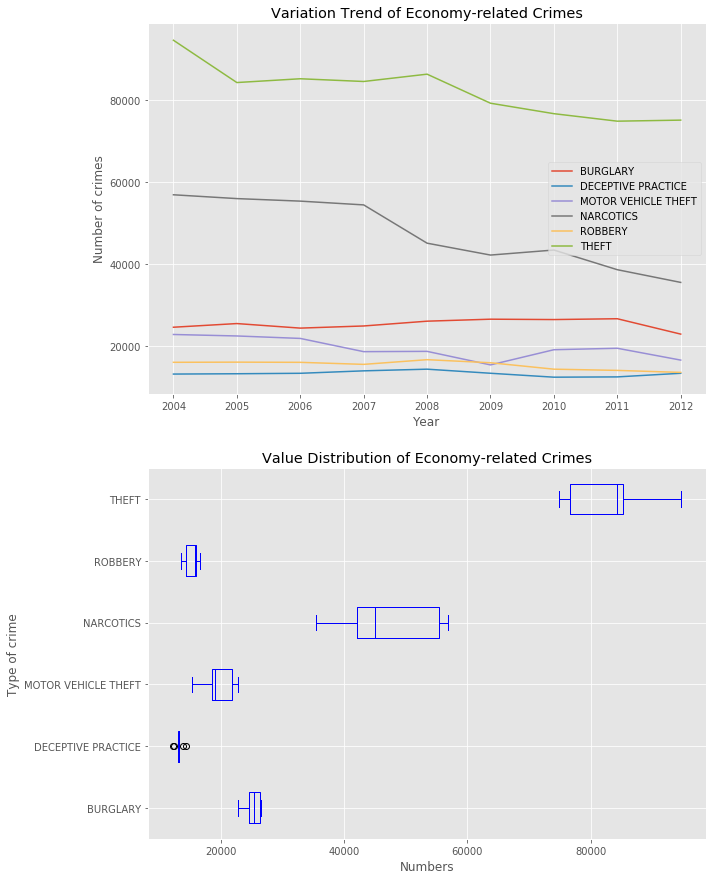

In [113]:
# Line chart and box plot
fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot). 

economy_related.plot.line(figsize=(10,15),ax=ax0)
ax0.set_title('Variation Trend of Economy-related Crimes')
ax0.set_ylabel('Number of crimes')
ax0.set_xlabel('Year')
ax0.legend(loc='best')

economy_related.plot(kind='box', figsize=(10, 15), color='blue', vert=False,ax=ax1)
ax1.set_title('Value Distribution of Economy-related Crimes')
ax1.set_xlabel('Numbers')
ax1.set_ylabel('Type of crime')
plt.show()

#### Heat map

In [118]:
address = 'Chicago, US'

geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago City are 41.8755616, -87.6244212.


In [119]:
map_chicago = folium.Map(location=[latitude, longitude],zoom_start=10)
map_chicago

In [183]:
# get latitudes and longitudes for heat map later
x = Chicago_Crime[['latitude','longitude']].to_numpy()
latlongs = x.tolist()

In [ ]:
# Generate a heat map of crime in Chicago from 2004 to 2012
from folium import plugins
from folium.plugins import HeatMap

map_chicago = folium.Map(location=[latitude, longitude],zoom_start=10)

HeatMap(latlongs,radius=7).add_to(map_chicago)
map_chicago


In [207]:
Chicago_Crime.columns

Index(['Year', 'Community Area Number', 'Primary Type', 'Location Description',
       'latitude', 'longitude', 'COMMUNITY AREA NAME'],
      dtype='object')

#### K-means clustering - cluster communities

In [33]:
# communityData to store information of each community
communityCoords= Chicago_Crime.groupby('COMMUNITY AREA NAME').mean()
communityCoords.head()

,Community Area Number,latitude,longitude
COMMUNITY AREA NAME,,,
Albany Park,14,41.967125,-87.718657
Archer Heights,57,41.806027,-87.726585
Armour Square,34,41.840869,-87.634245
Ashburn,70,41.746047,-87.709363
Auburn Gresham,71,41.745894,-87.655860


In [313]:
# crime in each community
community_crime_Data = Chicago_Crime.set_index('COMMUNITY AREA NAME')
community_crime_Data = pd.get_dummies(community_crime_Data[['Primary Type']],prefix="",prefix_sep="")
# Group rows by communities and by taking the mean of the frequency of occurrence of each crime type
community_crime_Data = community_crime_Data.groupby(by='COMMUNITY AREA NAME').mean().reset_index()
# join two data frames and get the complete dataset for communities
communityData = community_crime_Data.join(communityCoords,on='COMMUNITY AREA NAME',how='inner')
communityData.head()

,COMMUNITY AREA NAME,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Community Area Number,latitude,longitude
0,Albany Park,0.001857,0.052711,0.182370,0.069456,0.003405,0.149189,0.000031,0.027331,0.029621,0.001207,0.000929,0.002105,0.000867,0.000650,0.005664,0.058561,0.068373,0.0,0.0,0.000031,0.007459,0.000186,0.071995,0.010771,0.000000,0.012783,0.0,0.035657,0.006098,0.000495,0.192677,0.007521,14,41.967125,-87.718657
1,Archer Heights,0.002651,0.044179,0.127384,0.082910,0.003313,0.187100,0.000000,0.013254,0.033355,0.000442,0.000884,0.000442,0.000442,0.001694,0.002356,0.068773,0.047714,0.0,0.0,0.000074,0.006259,0.000000,0.052353,0.032251,0.000000,0.007952,0.0,0.039246,0.004860,0.000442,0.232604,0.007069,57,41.806027,-87.726585
2,Armour Square,0.000688,0.043605,0.140453,0.047353,0.000994,0.130202,0.000000,0.046053,0.069997,0.005814,0.000688,0.001836,0.000688,0.000306,0.003136,0.056074,0.069997,0.0,0.0,0.000076,0.004360,0.000000,0.044217,0.002677,0.000076,0.004819,0.0,0.054697,0.003519,0.000918,0.261934,0.004819,34,41.840869,-87.634245
3,Ashburn,0.001538,0.065941,0.160755,0.095968,0.003461,0.167293,0.000000,0.019199,0.036979,0.001213,0.000858,0.001124,0.000532,0.001124,0.001361,0.053871,0.048191,0.0,0.0,0.000118,0.007485,0.000000,0.077804,0.001065,0.000000,0.009378,0.0,0.046416,0.004112,0.000414,0.185043,0.008757,70,41.746047,-87.709363
4,Auburn Gresham,0.001372,0.068055,0.207353,0.074339,0.003786,0.111437,0.000085,0.029329,0.023168,0.003558,0.001401,0.002470,0.000681,0.000899,0.001372,0.048786,0.126683,0.0,0.0,0.000009,0.009218,0.000000,0.065405,0.007155,0.000019,0.005981,0.0,0.047423,0.002480,0.000473,0.144457,0.012606,71,41.745894,-87.655860


In [247]:
# Create a map show community locations on Chicago map
map_chicago = folium.Map(location=[latitude, longitude],zoom_start=10)
# add markers
for name, lat, lng in zip(communityData['COMMUNITY AREA NAME'],communityData['latitude'],communityData['longitude']):
    label = "{}".format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_chicago)
# visualise it
map_chicago

In [314]:
# Kmeans clustering
# Find the best K for clustering
chicago_grouped_clustering = communityData.drop(columns=['COMMUNITY AREA NAME','latitude','longitude','Community Area Number'])
SSD = {}
for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(chicago_grouped_clustering)
    SSD[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center




In [315]:
print(SSD)

{1: 1.144525950334641, 2: 0.6659254214988608, 3: 0.47629067127887026, 4: 0.37566018107908183, 5: 0.32643502160006693, 6: 0.27710031028973103, 7: 0.24557635979033837, 8: 0.21115034701585683, 9: 0.19703452490714968, 10: 0.17968930003236916, 11: 0.16860496396633662, 12: 0.15950596246535031, 13: 0.15059748666848485, 14: 0.13489684101203145, 15: 0.1291283115515982, 16: 0.12315025863024663, 17: 0.11476346393132011, 18: 0.11198533344766945, 19: 0.1020208330168022}


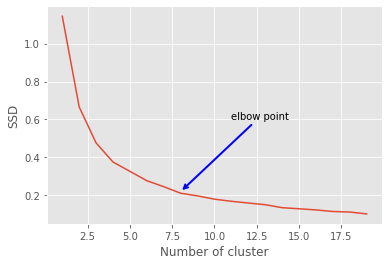

In [319]:
# Best K equals 8 
# Plot the figure of the change of SSD over different K
plt.figure()
plt.plot(list(SSD.keys()), list(SSD.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSD")

plt.annotate('elbow point',            # s: str. Will leave it blank for no text
             xy=(8, 0.22),             # place head of the arrow at point 
             xytext=(11, 0.6),         # place base of the arrow at point 
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

In [317]:

kclusters = 8
chicago_grouped_clustering = communityData.drop(columns=['COMMUNITY AREA NAME','latitude','longitude','Community Area Number'])
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(chicago_grouped_clustering)
# insert labels
communityData.insert(loc=1,column= 'Cluster Labels', value=kmeans.labels_)
communityData.head()


,COMMUNITY AREA NAME,Cluster Labels,ARSON,ASSAULT,BATTERY,BURGLARY,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,Community Area Number,latitude,longitude
0,Albany Park,2,0.001857,0.052711,0.182370,0.069456,0.003405,0.149189,0.000031,0.027331,0.029621,0.001207,0.000929,0.002105,0.000867,0.000650,0.005664,0.058561,0.068373,0.0,0.0,0.000031,0.007459,0.000186,0.071995,0.010771,0.000000,0.012783,0.0,0.035657,0.006098,0.000495,0.192677,0.007521,14,41.967125,-87.718657
1,Archer Heights,1,0.002651,0.044179,0.127384,0.082910,0.003313,0.187100,0.000000,0.013254,0.033355,0.000442,0.000884,0.000442,0.000442,0.001694,0.002356,0.068773,0.047714,0.0,0.0,0.000074,0.006259,0.000000,0.052353,0.032251,0.000000,0.007952,0.0,0.039246,0.004860,0.000442,0.232604,0.007069,57,41.806027,-87.726585
2,Armour Square,6,0.000688,0.043605,0.140453,0.047353,0.000994,0.130202,0.000000,0.046053,0.069997,0.005814,0.000688,0.001836,0.000688,0.000306,0.003136,0.056074,0.069997,0.0,0.0,0.000076,0.004360,0.000000,0.044217,0.002677,0.000076,0.004819,0.0,0.054697,0.003519,0.000918,0.261934,0.004819,34,41.840869,-87.634245
3,Ashburn,2,0.001538,0.065941,0.160755,0.095968,0.003461,0.167293,0.000000,0.019199,0.036979,0.001213,0.000858,0.001124,0.000532,0.001124,0.001361,0.053871,0.048191,0.0,0.0,0.000118,0.007485,0.000000,0.077804,0.001065,0.000000,0.009378,0.0,0.046416,0.004112,0.000414,0.185043,0.008757,70,41.746047,-87.709363
4,Auburn Gresham,0,0.001372,0.068055,0.207353,0.074339,0.003786,0.111437,0.000085,0.029329,0.023168,0.003558,0.001401,0.002470,0.000681,0.000899,0.001372,0.048786,0.126683,0.0,0.0,0.000009,0.009218,0.000000,0.065405,0.007155,0.000019,0.005981,0.0,0.047423,0.002480,0.000473,0.144457,0.012606,71,41.745894,-87.655860


##### visualise the clusters

In [318]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Create a map show community locations on Chicago map
map_chicago = folium.Map(location=[latitude, longitude],zoom_start=10)
# add markers
for name, lat, lng,cluster in zip(communityData['COMMUNITY AREA NAME'],communityData['latitude'],
                                  communityData['longitude'],communityData['Cluster Labels']):
    label = "{} Cluster {}".format(name,cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1,
        parse_html=False).add_to(map_chicago)
# visualise it
map_chicago

### Crimes versus Community Poverty

In [327]:
communityCoords.head()

,Community Area Number,latitude,longitude
COMMUNITY AREA NAME,,,
Albany Park,14,41.967125,-87.718657
Archer Heights,57,41.806027,-87.726585
Armour Square,34,41.840869,-87.634245
Ashburn,70,41.746047,-87.709363
Auburn Gresham,71,41.745894,-87.655860


In [321]:
CensusData.head()

,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,PERCENT HOUSEHOLDS BELOW POVERTY
0,1,Rogers Park,23939,23.6
1,2,West Ridge,23040,17.2
2,3,Uptown,35787,24.0
3,4,Lincoln Square,37524,10.9
4,5,North Center,57123,7.5


#### Generate new data frame with communities' financial info

In [28]:
#communityCoords['Community Area Number'].map(CensusData.set_index('Community Area Number')['PERCENT HOUSEHOLDS BELOW POVERTY'])
communityCoords_finance = communityCoords.join(CensusData[['COMMUNITY AREA NAME','PERCENT HOUSEHOLDS BELOW POVERTY',
                                      'PER CAPITA INCOME ']].set_index('COMMUNITY AREA NAME'),
                          how='inner')

In [29]:
communityCoords_finance.head()

,Community Area Number,latitude,longitude,PERCENT HOUSEHOLDS BELOW POVERTY,PER CAPITA INCOME
COMMUNITY AREA NAME,,,,,
Albany Park,14,41.967125,-87.718657,19.2,21323
Archer Heights,57,41.806027,-87.726585,14.1,16134
Armour Square,34,41.840869,-87.634245,40.1,16148
Ashburn,70,41.746047,-87.709363,10.4,23482
Auburn Gresham,71,41.745894,-87.655860,27.6,15528


In [42]:
# crime coordinates from 2008 to 2012
# get latitudes and longitudes for heat map later
ll = Chicago_Crime.loc[Chicago_Crime['Year'].isin(['2008','2009','2010','2011','2012']),['latitude','longitude']]
latlongs = ll.to_numpy().tolist()

In [ ]:
communityCoords_finance.sort_values(by=['PERCENT HOUSEHOLDS BELOW POVERTY'],axis=0,inplace=True,ascending=False)
map_chicago = folium.Map(location=[latitude, longitude],zoom_start=10)
#plot heat map
HeatMap(latlongs,radius=7).add_to(map_chicago)
#plot the top 10 poor communities with high percentage of households below poverty
top10_poorest = communityCoords_finance.head(10)
# add markers
for name, lat, lng,percent in zip(top10_poorest.index.values,top10_poorest['latitude'],
                                  top10_poorest['longitude'],top10_poorest['PERCENT HOUSEHOLDS BELOW POVERTY']):
    label = "{} with {}".format(name,percent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        #fill_color='#3186cc',
        fill_color='blue',
        fill_opacity=0.5,
        parse_html=False).add_to(map_chicago)

#plot the top 10 rich communities with low percentage of households below poverty
top10_richest = communityCoords_finance.tail(10)
for name, lat, lng,percent in zip(top10_richest.index.values,top10_richest['latitude'],
                                  top10_richest['longitude'],top10_richest['PERCENT HOUSEHOLDS BELOW POVERTY']):
    label = "{} with {}".format(name,percent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        #fill_color='#3186cc',
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(map_chicago)


map_chicago

In [ ]:
communityCoords_finance.sort_values(by=['PER CAPITA INCOME '],axis=0,inplace=True)
map_chicago = folium.Map(location=[latitude, longitude],zoom_start=10)
#plot heat map
HeatMap(latlongs,radius=7).add_to(map_chicago)
#plot the top 10 poor communities with low capital income
top10_poorest = communityCoords_finance.head(10)
# add markers
for name, lat, lng,percent in zip(top10_poorest.index.values,top10_poorest['latitude'],
                                  top10_poorest['longitude'],top10_poorest['PERCENT HOUSEHOLDS BELOW POVERTY']):
    label = "{} with {}".format(name,percent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        #fill_color='#3186cc',
        fill_color='blue',
        fill_opacity=0.5,
        parse_html=False).add_to(map_chicago)

#plot the top 10 rich communities with high capital income
top10_richest = communityCoords_finance.tail(10)
for name, lat, lng,percent in zip(top10_richest.index.values,top10_richest['latitude'],
                                  top10_richest['longitude'],top10_richest['PERCENT HOUSEHOLDS BELOW POVERTY']):
    label = "{} with {}".format(name,percent)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        #fill_color='#3186cc',
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(map_chicago)



map_chicago

In [47]:
communityCoords_finance

,Community Area Number,latitude,longitude,PERCENT HOUSEHOLDS BELOW POVERTY,PER CAPITA INCOME
COMMUNITY AREA NAME,,,,,
Riverdale,54,41.655970,-87.606151,56.5,8201
South Lawndale,30,41.845384,-87.711146,30.7,10402
Fuller Park,37,41.806368,-87.632450,51.2,10432
West Garfield Park,26,41.878649,-87.729269,41.7,10934
West Englewood,67,41.776908,-87.665501,34.4,11317
Englewood,68,41.776442,-87.644064,46.6,11888
North Lawndale,29,41.861010,-87.716600,43.1,12034
Gage Park,63,41.791701,-87.697702,23.4,12171
Burnside,47,41.727959,-87.597240,33.0,12515
